# Image Classification Project

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Dataset Pre-Processing

### To recognize anyone we usually identify the face first,so the model will need to detect a face and then eyes . In this process we will first check for the face in the photograph (face should be clear) and then will check for the two eyes and if it is less than that then that image will be neglected.

In [2]:
img=cv2.imread("sharapova1.jpg")
img.shape

(555, 700, 3)

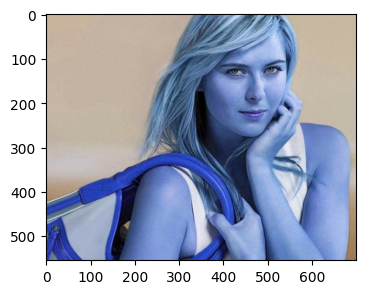

In [3]:
plt.figure(figsize=(4,4))
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

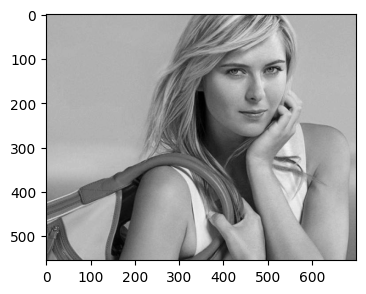

In [6]:
plt.figure(figsize=(4,4))
plt.imshow(gray,cmap="gray")

In [7]:
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray,1.3,6)
faces

array([[352,  38, 233, 233]])

In [8]:
faces[0]

array([352,  38, 233, 233])

In [9]:
x,y,w,h = faces[0]
x,y,w,h

(352, 38, 233, 233)

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
face_img

array([[[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [195, 181, 158],
        [194, 180, 157],
        [193, 179, 156]],

       [[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [196, 182, 159],
        [194, 180, 157],
        [193, 179, 156]],

       [[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [196, 182, 159],
        [195, 181, 158],
        [193, 179, 156]],

       ...,

       [[ 26,  58, 158],
        [ 30,  59, 163],
        [ 33,  59, 165],
        ...,
        [154, 120,  84],
        [154, 120,  84],
        [154, 120,  84]],

       [[ 30,  62, 162],
        [ 32,  61, 165],
        [ 35,  61, 167],
        ...,
        [154, 120,  84],
        [154, 120,  84],
        [154, 120,  84]],

       [[ 35,  67, 167],
        [ 34,  63, 167],
        [ 36,  62, 168],
        ...,
        [153, 119,  83],
        [153, 119,  83],
        [153, 119,  83]]

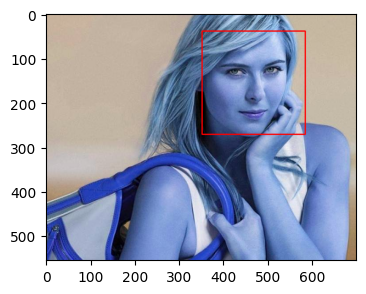

In [11]:
plt.figure(figsize=(4,4))
plt.imshow(face_img)

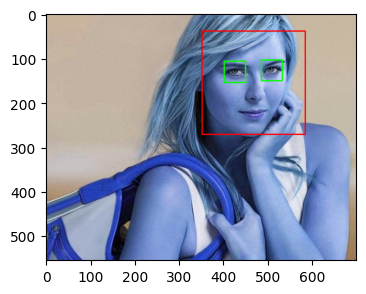

In [12]:
cv2.destroyAllWindows()
for x,y,w,h in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eye=eye_cascade.detectMultiScale(roi_gray)
    for ex,ey,ew,eh in eye:
       cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure(figsize=(4,4))
plt.imshow(face_img)        
    

## Cropping the facial region of the image 

In [13]:
cropped_image=roi_color

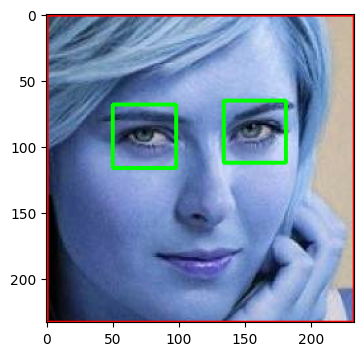

In [14]:
plt.figure(figsize=(4,4))
plt.imshow(cropped_image,cmap="gray")

## Pre-Processing the image to get its wavelet transformed form.

### In the wavelet transformed image due to different shaded edges clear facial features can be obtained 

In [15]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

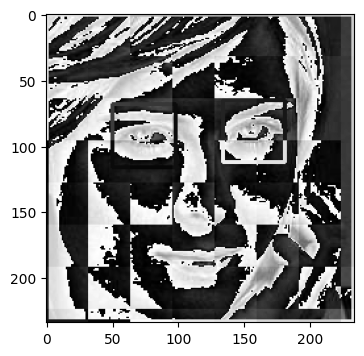

In [16]:
plt.figure(figsize=(4,4))
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

### Preprocessing Load image, detect face. If eyes >=2, then save and crop the face region

In [17]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

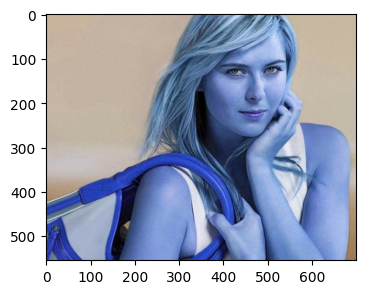

In [18]:
plt.figure(figsize=(4,4))
original_image = cv2.imread('sharapova1.jpg')
plt.imshow(original_image)

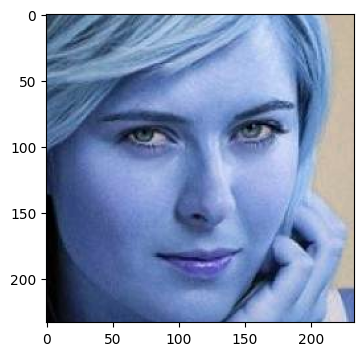

In [19]:
plt.figure(figsize=(4,4))
cropped_image_ = get_cropped_image_if_2_eyes('sharapova1.jpg')
plt.imshow(cropped_image_)

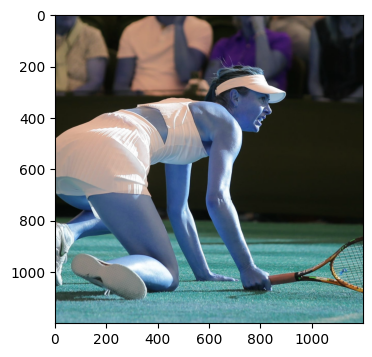

In [20]:
plt.figure(figsize=(4,4))
org_image_obstructed = cv2.imread('2900.jpg')
plt.imshow(org_image_obstructed)

In [21]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('2900.jpg')
cropped_image_no_2_eyes

#### Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training

In [22]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [23]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [24]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

#### Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [25]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [26]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


### The cropped folder under datasets folder is created that contains cropped images

### Now we need to manually identify the cropped folder and delete the unwanted images  

In [27]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name=img_dir.split("/")[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict       

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\

In [28]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict    

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

### Now lets prepare the training and the testing set for the training the model using both the wavelet transformed and the raw image 

In [58]:
X=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img_=cv2.imread(training_img)
        scalled_raw_image=cv2.resize(img_,(32,32))
        image_har=w2d(img_,'db1',5)
        scalled_image_har=cv2.resize(image_har,(32,32))
        combined_img=np.vstack((scalled_raw_image.reshape(32*32*3,1),scalled_image_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [30]:
len(X[0])

4096

In [60]:
X[0].shape

(4096, 1)

In [31]:
len(y)

187

In [32]:
len(X)

187

In [33]:
X= np.array(X).reshape(len(X),4096).astype(float)
X.shape

(187, 4096)

## Data cleaning process is done.So now we can train our model

## Machine Learning Models

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [36]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7872340425531915

In [37]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.78      1.00      0.88         7
           2       0.60      0.50      0.55         6
           3       0.73      0.89      0.80         9
           4       0.90      0.69      0.78        13

    accuracy                           0.79        47
   macro avg       0.77      0.78      0.77        47
weighted avg       0.79      0.79      0.78        47



### Let's use GridSearch to try out different models with different paramets to get the best model 

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [40]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.785714,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.600000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.792857,{'logisticregression__C': 1}


In [41]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [42]:
best_estimators['svm'].score(X_test,y_test)

0.7872340425531915

In [43]:
best_estimators['random_forest'].score(X_test,y_test)

0.6595744680851063

In [44]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8085106382978723

In [45]:
best_clf = best_estimators['svm']

### Plotting the Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  1,  0,  1],
       [ 0,  7,  0,  0,  0],
       [ 1,  0,  3,  2,  0],
       [ 0,  0,  1,  8,  0],
       [ 1,  2,  0,  1,  9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

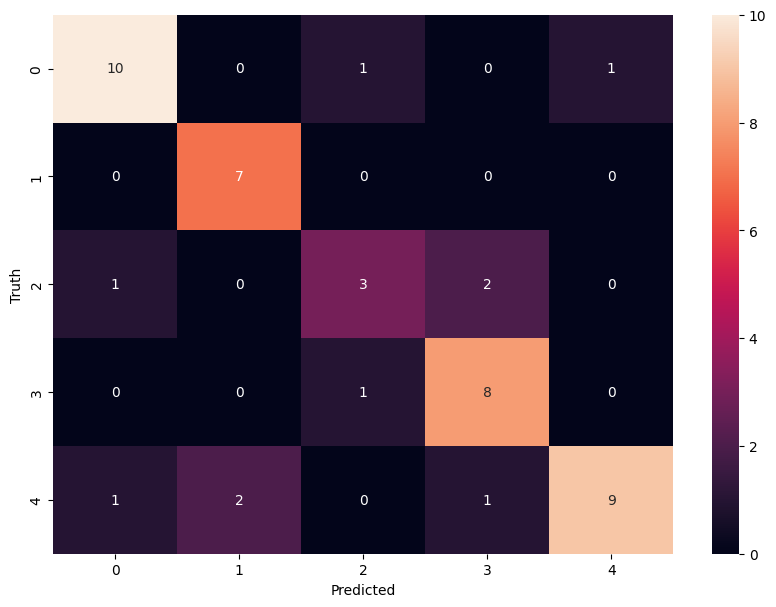

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Saving the Pickle Model

In [48]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

## Now doing the Classification using CNN (Deep Learning)

In [55]:
import tensorflow as tf
from tensorflow import keras

In [77]:
X_=[]
y_=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img_=cv2.imread(training_img)
        scalled_raw_image=cv2.resize(img_,(32,32))
        X_.append(scalled_raw_image)
        y_.append(class_dict[celebrity_name])

In [78]:
X_ =np.array(X_).astype(float)
X_.shape

(187, 32, 32, 3)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_,y_,random_state=42)

In [80]:
X_train=X_train/255
X_test=X_test/255

In [81]:
X_train[0].shape

(32, 32, 3)

In [82]:
X_train.shape

(140, 32, 32, 3)

In [83]:
y_train=np.array(y_train)

In [84]:
y_test=np.array(y_test)

In [107]:
model1=tf.keras.Sequential([
    keras.layers.Conv2D(16,3,input_shape=(32,32,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
        
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(5,activation="sigmoid")
])
model.build(input_shape=(32,32,3))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [108]:
model1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [109]:
model1.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
5/5 [==============================] - 3s 59ms/step - loss: 1.6394 - accuracy: 0.1786
Epoch 2/100
5/5 [==============================] - 0s 62ms/step - loss: 1.5700 - accuracy: 0.3286
Epoch 3/100
5/5 [==============================] - 0s 61ms/step - loss: 1.5367 - accuracy: 0.2786
Epoch 4/100
5/5 [==============================] - 0s 70ms/step - loss: 1.4899 - accuracy: 0.3786
Epoch 5/100
5/5 [==============================] - 0s 72ms/step - loss: 1.4458 - accuracy: 0.4000
Epoch 6/100
5/5 [==============================] - 0s 66ms/step - loss: 1.3667 - accuracy: 0.4929
Epoch 7/100
5/5 [==============================] - 0s 84ms/step - loss: 1.3118 - accuracy: 0.5071
Epoch 8/100
5/5 [==============================] - 0s 78ms/step - loss: 1.1983 - accuracy: 0.6286
Epoch 9/100
5/5 [==============================] - 0s 68ms/step - loss: 1.1090 - accuracy: 0.7357
Epoch 10/100
5/5 [==============================] - 0s 62ms/step - loss: 1.0023 - accuracy: 0.7143
Epoch 11/100
5/5 [=

5/5 [==============================] - 0s 60ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 84/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 85/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 86/100
5/5 [==============================] - 0s 66ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 87/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 88/100
5/5 [==============================] - 0s 59ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 89/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 90/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 91/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 92/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 93/100
5/5 [=====

In [110]:
model1.evaluate(X_test,y_test)

2/2 [==============================] - 1s 40ms/step - loss: 1.0160 - accuracy: 0.7872


[1.0160497426986694, 0.7872340679168701]

In [100]:
model2=tf.keras.Sequential([
    keras.layers.Conv2D(16,3,input_shape=(32,32,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
        
    keras.layers.Flatten(),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(5,activation="sigmoid")
])
model.build(input_shape=(32,32,3))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [103]:
model2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [104]:
model2.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
5/5 [==============================] - 3s 73ms/step - loss: 1.6141 - accuracy: 0.1786
Epoch 2/100
5/5 [==============================] - 0s 51ms/step - loss: 1.6031 - accuracy: 0.3143
Epoch 3/100
5/5 [==============================] - 0s 56ms/step - loss: 1.5958 - accuracy: 0.4143
Epoch 4/100
5/5 [==============================] - 0s 56ms/step - loss: 1.5885 - accuracy: 0.3500
Epoch 5/100
5/5 [==============================] - 0s 50ms/step - loss: 1.5726 - accuracy: 0.2857
Epoch 6/100
5/5 [==============================] - 0s 58ms/step - loss: 1.5653 - accuracy: 0.2571
Epoch 7/100
5/5 [==============================] - 0s 53ms/step - loss: 1.5382 - accuracy: 0.3214
Epoch 8/100
5/5 [==============================] - 0s 62ms/step - loss: 1.5117 - accuracy: 0.4071
Epoch 9/100
5/5 [==============================] - 0s 57ms/step - loss: 1.4725 - accuracy: 0.3357
Epoch 10/100
5/5 [==============================] - 0s 67ms/step - loss: 1.4368 - accuracy: 0.4357
Epoch 11/100
5/5 [=

5/5 [==============================] - 0s 53ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 84/100
5/5 [==============================] - 0s 53ms/step - loss: 0.0249 - accuracy: 1.0000
Epoch 85/100
5/5 [==============================] - 0s 49ms/step - loss: 0.0239 - accuracy: 1.0000
Epoch 86/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 87/100
5/5 [==============================] - 0s 76ms/step - loss: 0.0216 - accuracy: 1.0000
Epoch 88/100
5/5 [==============================] - 0s 68ms/step - loss: 0.0213 - accuracy: 1.0000
Epoch 89/100
5/5 [==============================] - 0s 78ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 90/100
5/5 [==============================] - 0s 67ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 91/100
5/5 [==============================] - 0s 48ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 92/100
5/5 [==============================] - 0s 57ms/step - loss: 0.0184 - accuracy: 1.0000
Epoch 93/100
5/5 [=====

In [106]:
model2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 36ms/step - loss: 1.0027 - accuracy: 0.8085


[1.002655029296875, 0.8085106611251831]

In [111]:
model3=tf.keras.Sequential([
    keras.layers.Conv2D(8,3,input_shape=(32,32,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
        
    keras.layers.Flatten(),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(5,activation="sigmoid")
])
model.build(input_shape=(32,32,3))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [112]:
model3.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [113]:
model3.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
5/5 [==============================] - 3s 44ms/step - loss: 1.6636 - accuracy: 0.2071
Epoch 2/100
5/5 [==============================] - 0s 39ms/step - loss: 1.6003 - accuracy: 0.2357
Epoch 3/100
5/5 [==============================] - 0s 45ms/step - loss: 1.5747 - accuracy: 0.2286
Epoch 4/100
5/5 [==============================] - 0s 39ms/step - loss: 1.5518 - accuracy: 0.4143
Epoch 5/100
5/5 [==============================] - 0s 44ms/step - loss: 1.5269 - accuracy: 0.4714
Epoch 6/100
5/5 [==============================] - 0s 43ms/step - loss: 1.4911 - accuracy: 0.4929
Epoch 7/100
5/5 [==============================] - 0s 37ms/step - loss: 1.4544 - accuracy: 0.4500
Epoch 8/100
5/5 [==============================] - 0s 38ms/step - loss: 1.3968 - accuracy: 0.4500
Epoch 9/100
5/5 [==============================] - 0s 48ms/step - loss: 1.3509 - accuracy: 0.5071
Epoch 10/100
5/5 [==============================] - 0s 41ms/step - loss: 1.2870 - accuracy: 0.5214
Epoch 11/100
5/5 [=

5/5 [==============================] - 0s 35ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 84/100
5/5 [==============================] - 0s 35ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 85/100
5/5 [==============================] - 0s 35ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 86/100
5/5 [==============================] - 0s 41ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 87/100
5/5 [==============================] - 0s 39ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 88/100
5/5 [==============================] - 0s 39ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 89/100
5/5 [==============================] - 0s 38ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 90/100
5/5 [==============================] - 0s 52ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 91/100
5/5 [==============================] - 0s 42ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 92/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 93/100
5/5 [=====

In [114]:
model3.evaluate(X_test,y_test)

2/2 [==============================] - 0s 31ms/step - loss: 1.0225 - accuracy: 0.7021


[1.0224556922912598, 0.7021276354789734]

In [93]:
y_pred=model.predict(X_test)

2/2 [==============================] - 0s 31ms/step


In [94]:
y_pred=[np.argmax(i) for i in y_pred]

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.80      0.57      0.67         7
           2       0.67      0.67      0.67         6
           3       0.75      1.00      0.86         9
           4       0.82      0.69      0.75        13

    accuracy                           0.79        47
   macro avg       0.78      0.77      0.76        47
weighted avg       0.79      0.79      0.78        47



#### Confusion Matrix

In [96]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

Text(0.5, 47.7222222222222, 'predictions')

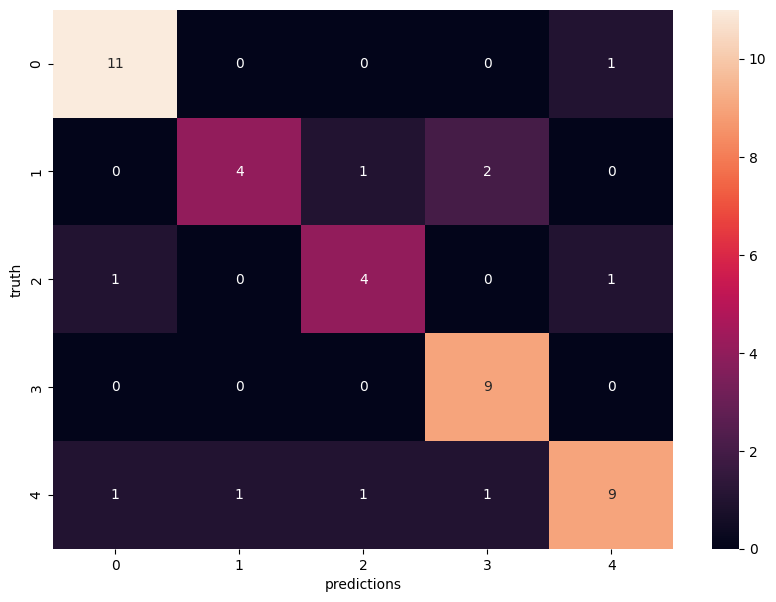

In [97]:
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel("truth")
plt.xlabel("predictions")

#### Saving the CNN model

In [99]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(model, 'saved_cnn_model.pkl') 


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-08-16 02:00:40         3093
metadata.json                                  2023-08-16 02:00:40           64
variables.h5            

['saved_cnn_model.pkl']